In [1]:
import numpy as np
import pandas as pd
import geopandas as gp
import os
import subprocess
import shapely as shp
from datetime import datetime

# make sure we are at the top of the repo
wd = subprocess.check_output('git rev-parse --show-toplevel', shell = True)
os.chdir(wd[:-1]) #-1 removes \n

In [2]:
# read in data

df = gp.read_file('data/citi_docks2/citi_docks2.shp')

In [3]:
# how dense are citibike stations? near = within a quarter mile
a = []
df['citi_ct'] = 0
for i in range(len(df)):
    # includes stations not in Manhattan, return 0 for CB. 
    try: 
        a.append(len(df[df.geometry.intersects(df.iloc[i].geometry.buffer(2 * 5280))]))
    except: 
        a.append(0)
    print '\r',"%",str((i+1)*100./len(df))[:4],
df['citi_ct'] = a
df = df.reindex()

% 100.


In [4]:
# export final data
if not os.path.exists('data/citi_density/'):
    os.makedirs('data/citi_density/')
    
df.to_file('data/citi_density/citi_density.shp')

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([  4.,  14.,  14.,  29.,  35.,  29.,  30.,  37.,  56.,  70.]),
 array([  42. ,   59.4,   76.8,   94.2,  111.6,  129. ,  146.4,  163.8,
         181.2,  198.6,  216. ]),
 <a list of 10 Patch objects>)

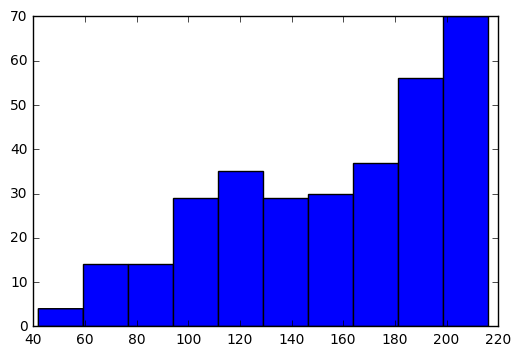

In [5]:
import pylab
%pylab inline

hist(df.citi_ct)